# Harry Potter sentence classifier

## Data preparation

### Load books from files

In [1]:
filenames = {
    1: "Book 1 - The Philosopher's Stone.txt",
    2: 'Book 2 - The Chamber of Secrets.txt',
    3: 'Book 3 - The Prisoner of Azkaban.txt',
    4: 'Book 4 - The Goblet of Fire.txt',
    5: 'Book 5 - The Order of the Phoenix.txt',
    6: 'Book 6 - The Half Blood Prince.txt',
    7: 'Book 7 - The Deathly Hallows.txt'
}

In [2]:
books = {}
for id, filename in filenames.items():
    with open('books/' + filename, 'r') as file:
        book = file.read().replace('\n', '')
    books[id] = book

### Remove footers from each page

In [3]:
import re
footers = {
    1: r'Page \| \d Harry Potter and the Philosophers Stone - J.K. Rowling',
    2: r'Page \| \d Harry Potter and the Chamber of Secrets - J.K. Rowling',
    3: r'Page \| \d Harry Potter and the Prisoner of Azkaban - J.K. Rowling',
    4: r'Page \| \d Harry Potter and the Goblet of Fire - J.K. Rowling',
    5: r'Page \| \d Harry Potter and the Order of the Phoenix - J.K. Rowling',
    6: r'Page \| \d Harry Potter and the Half Blood Prince - J.K. Rowling',
    7: r'Page \| \d Harry Potter and the Deathly Hallows - J.K. Rowling'
}

In [4]:
for book, content in books.items():
    books[book] = re.sub(footers[book], '', content)

### Convert books to sentences

In [5]:
from nltk.tokenize import sent_tokenize

In [6]:
sentences = {}
for book, content in books.items():
    sentences[book] = sent_tokenize(content)

### Count sentences

In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

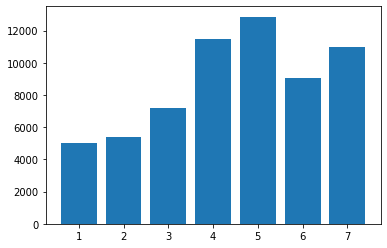

In [8]:
plt.bar(sentences.keys(), [len(s) for s in sentences.values()])

### Prepare dataset

In [9]:
import mlflow

In [10]:
exp_id = mlflow.set_experiment('harry-potter-sentence-classifier')
mlflow.start_run()

<ActiveRun: >

In [11]:
SEED = 42

In [12]:
sample_size = 500
mlflow.log_param("sample_size", sample_size)

In [13]:
import random
X, y = [], []
for book, sentence in sentences.items():
    random.Random(SEED).shuffle(sentences[book])
    selected = sentences[book][:sample_size]
    X += selected
    y += [book] * len(selected)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Training

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mlp', MLPClassifier()),
])

In [17]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mlp', MLPClassifier())])

In [18]:
y_pred = clf.predict(X_train)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
acc = accuracy_score(y_train, y_pred)
mlflow.log_metric("train_acc", acc)

### Testing

In [21]:
y_pred = clf.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
mlflow.log_metric("test_acc", acc)

In [ ]:
mlflow.end_run()